# Traitement d'images au format PGM

Le but de ce projet est de développer une application qui permet de lire, écrire et manipuler des images au format PGM.

## Introduction

Une image peut être stockée sous la forme d'un tableau de points élémentaires appelés pixels (abréviation de picture elements). On s'intéressera dans un premier temps à la manipulation d'images
 en niveaux de gris (ou grayscale en anglais), c’est-à-dire, des images dont les ''couleurs'' sont uniquement des nuances de gris. On peut représenter une telle image par une matrice d’entiers, dont la valeur des éléments représente l’intensité lumineuse des pixels de l’image. Par conséquent, un traitement d’image peut être réalisé en manipulant 
 la matrice qui la représente.

## Fichier PGM

Un fichier PGM (Portable Gray Map) est composé de deux parties : 

* Un entête indiquant les paramètres de l'image
* Une matrice dont chaque élément représente le niveau de gris d’un pixel de l’image.

 L’entête contient 3 lignes. La première ligne est toujours la même, il s’agit de l’identifiant du fichier PGM : P2 pour une image codée en ASCII et P5 pour une image codée en binaire. La seconde ligne contient 2 entiers séparés par un espace: le nombre de colonnes et le nombre de lignes de pixels de l’image.

 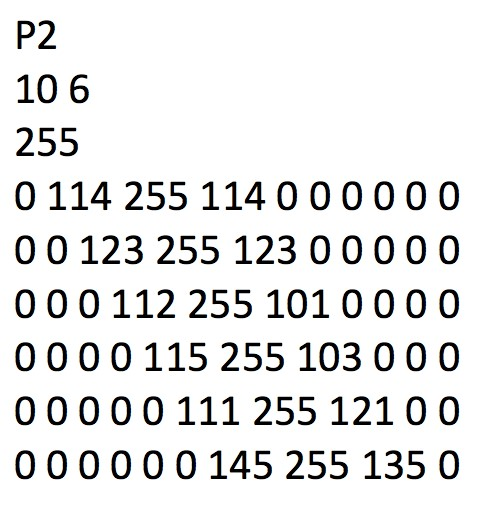 



 Enfin, la troisième ligne contient la valeur maximale que peut prendre un pixel (par exemple : 255 pour un codage des niveaux de gris entre 0 et 255). 
 Les lignes qui suivent donnent l’intensité de chaque pixel. Ceux-ci sont énumérés ligne par ligne et colonne par colonne. Ainsi la première valeur est l’intensité du pixel du coin supérieur gauche, la seconde est l’intensité du pixel de la première ligne, deuxième colonne, etc.

Par exemple, un fichier PGM contenant les informations ci-dessous est l’encodage d’une image représentant une barre oblique blanche sur fond noir (voir Fig. 1 du sujet en pdf). 

# Organisation du programme

Pour travailler sur une image (modifier la valeur des pixels pour changer le contraste de l'image par exemple), il est nécessaire de dissocier deux entités :

* Le fichier contenant l'image, qui est stocké sur disque dur.
* La représentation en mémoire de l'image, qui est stockée dans la mémoire vive allouée au programme. C'est sur cette représentation mémoire que l'on effectuera toutes les manipulations de l'image. Une fois l'image modifée à notre convenance, il sera possible de la stocker dans un fichier via une fonction dédiée.

Dans ce projet, vous stockerez l'image en mémoire sous la forme d'un tableau numpy 
de taille NROWS $\times$ NCOLS où NROWS est le nombre de pixels en largeur et NCOLS celui
en hauteur. Ce tableau comprendra l'ensemble des pixels de l'image. 
Par ailleurs, pour minimiser la place mémoire, le tableau sera constitué d'élément du type {\tt uint8}, qui occupent un octet de mémoire seulement. 
Seules des images contenant au maximum 256 niveaux de gris pourront donc être traitées par notre programme. Le code suivant donne un exemple de création et d'utilisation du tableau contenant les valeurs des pixels de l'image.

On rappelle que
  
*  A=np.zeros(shape=(NROWS, NCOLS), dtype='uint8')
crée un tableau de zéros,
*  U=A.astype(np.uint8) force la conversion de type
d'un tableau de réels $R$ en un d'entiers non signés U. 

Votre programme devra lire et écrire des images au format PGM au format ASCII (texte).
Dans le fichier ASCII de l'image, les données de l'intensité lumineuse des pixels sont 
écrites sous forme d'un entier, 
chaque entier étant séparé par un espace  vide au moins, et chaque ligne de l'image étant séparée par un retour à la ligne.

# Travail à réaliser
On vous demande d'écrire sous Spyder, l'ensemble de fonctions suivantes permettant de générer, lire, écrire et manipuler les images au format PGM.

## Version scalaire

* On utilisera l'entête de programme suivant où deux variables globales MAXDEG et MAXTAIL seront utilisées dans tout le projet.

In [4]:
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from PIL import Image
from time import process_time

MAXDEG =255
MAXTAIL=256

* créer une fonction fun(x, y) qui à partir d'un couple de réels (x, y) 
retourne l'évaluation de $\frac{1}{2} (\sin(x)\; \sin(y)+1)$.
La valeur retournée est dans $[0, 1]$.

In [4]:
#CORRECTION
def fun(x, y):
    """ f(x,y)=0.5*(sin(x)*sin(y)+1) in [0, 1]  """
    return 0.5*(np.sin(x)*np.sin(y)+1.0)

* créer une fonction centering(i, L) qui à partir de deux entiers $i$ et $L$
retourne $2 i/L-1$. La fonction vérifiera que $i \in [0, L[$. 

On pourra mettre en oeuvre l'instruction suivante : 
assert condition, "out of range" en adaptant la condition à votre usage.

In [8]:
#CORRECTION
def centering(i, L):
    return (2.0*i-L)/L

* créer une fonction createImg(fun, NROWS=MAXTAIL, NCOLS=MAXTAIL, NLEVELS = MAXDEG)
qui retourne un tableau img de type numpy de taille NROWS $\times$ NCOLS contenant les valeurs
des pixels comprises entre 0 et 255. 

Pour tout couple d'indice $(i, j) \in $ [0, NROWS[ $\times$ [0, NCOLS[, définir
x=$\pi$ centering(i, NROWS) et y=$\pi$  centering(j, NCOLS)
et stocker dans l'élément $(i, j)$ la valeur de NLEVELS $\times$ fun(x, y)
dont on ne gardera que la partie entière. 

Pour ce faire utiliser la fonction $floor$
du module math.



In [5]:
#CORRECTION
def createImg(fun, NROWS = MAXTAIL, NCOLS = MAXTAIL, NLEVELS = MAXDEG):   
    img = np.zeros(shape=(NROWS, NCOLS), dtype='uint8')
    for i in range(NROWS):
        x = centering(i, NROWS)*np.pi
        for j in range(NCOLS):
            y = centering(j, NCOLS)*np.pi
            img[i, j]=math.floor(fun(x,y)*NLEVELS)
    return img

* créer une fonction writeImg(img, filename) qui sauvegarde
dans le fichier filename l'image img au format PGM ASCII.



In [6]:
#CORRECTION
def writeImg(img, filename):
    nrows, ncols = img.shape
    nlevs = img.max()
    
    with open(filename, 'w') as f:
        f.write('P2\n')
        f.write(str(ncols)+' '+str(nrows)+'\n')
        f.write(str(nlevs)+'\n')
        for row in img:
            for e in row:
                #chaine = "{var:4d}".format(var=e)
                chaine = f"{e:4d}"            
                f.write(chaine+' ')
            f.write('\n')

*  Proposer un petit programme test sur une petite image. Vérifier
avec un éditeur de texte que le fichier a la bonne structure.
Tester-le en prenant des valeurs de NROWS et NCOLS différentes!

On pourra utiliser un petit programme comme OpenSeeIt sous windows ou eog
sous linux pour visualiser l'image stockée.



In [7]:
#CORRECTION
img = createImg(fun)
writeImg(img, 'sinus.pgm')


* Un de vos collègues vous a fourni une fonction readImg(filename)
qui lit  le fichier PGM filename et qui retourne un tuple, en omettant de le documenter ! 

* Quelle est la structure du tuple retourné? Où se trouve le tableau
contenant l'image, quelles sont ses dimensions?
A quoi correspond le triplet (data[1],data[0]),data[2]) ?

In [13]:
# CODE FOURNI AUX APPRENANTS
def readImg(filename):
    with open(filename) as f:
        lines = f.readlines()

    # Ignores commented lines
    for l in list(lines):
        if l[0] == '#':
            lines.remove(l)

    # Makes sure it is ASCII format (P2)
    # leading and trailing whitespace removed
    assert lines[0].strip() == 'P2' 

    # Converts data to a list of integers
    data = []
    for line in lines[1:]:
        data.extend([int(c) for c in line.split()])

    return (np.array(data[3:]), (data[1],data[0]), data[2])

* Compléter le programme test en lisant une image PGM stocker dans un fichier
en utilisant  la fonction précédente tup = readImg(filename) puis
en insérant la portion de code suivante :

(array([127, 127, 127, ..., 127, 127, 127]), (256, 256), 255)


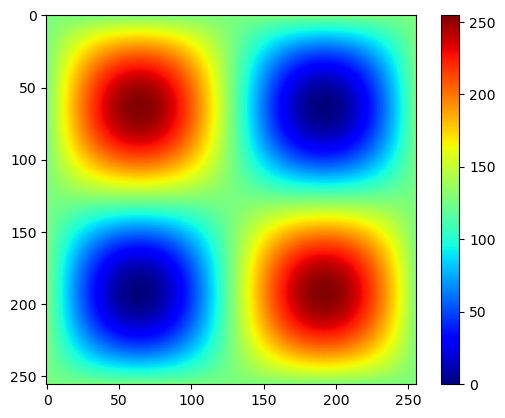

In [15]:
#CORRECTION
tup=readImg('sinus.pgm')
print(tup)
plt.imshow(np.reshape(tup[0],tup[1]), cmap=cm.jet) 
plt.colorbar()
plt.show()


In [14]:
print(tup[1])

(256, 256)


* En vous référant à la documentation de la fonction plt.imshow,
expliquer que fait la fonction numpy np.reshape(tup[0],tup[1])?

* On désire mesurer le temps CPU nécessaire pour générer une image
de taille 512 $\times$ 512. Utiliser la portion de code ci-après.
Noter le temps écoulé.

In [29]:
# CODE FOURNI AUX APPRENANTS
from time import process_time

# Start the stopwatch / counter 
t1_start = process_time() 

NROWS, NCOLS = 512, 512   
Z=createImg(fun, NROWS, NCOLS)
  
# Stop the stopwatch / counter
t1_stop = process_time()
print("Elapsed time (s):", t1_stop-t1_start) 

Elapsed time (s): 0.53125


# Version vectorielle

On complète notre programme test avec des versions vectorisées des
fonctions fun et createImg.

* Créer une fonction createImgVec(funvec, NROWS = MAXTAIL, NCOLS = MAXTAIL, NLEVELS = MAXDEG)
qui utilisera la fonction numpy np.meshgrid(x, y) où
x est un tableau numpy de NROWS valeurs équi-espacées entre $[-\pi,\pi]$
et y de NCOLS valeurs équi-espacées entre $[-\pi,\pi]$.
La fonction funvec mettra en oeuvre les versions vectorielles numpy de
la fonction sinus. 

La documentation de np.floor nous informe que la valeur retournée est un réel.
L'image étant codée avec des entiers non signés 8 bits,
il faut donc convertir le type en utilisant la méthode astype, vue dans la
section 3.

In [2]:
def createImgVec(fun, NROWS, NCOLS, NLEVELS=255):    
    x = np.arange(0, NROWS)
    x = centering(x, NROWS)*np.pi
    y = np.arange(0, NCOLS)
    y = centering(y, NCOLS)*np.pi
    X, Y = np.meshgrid(x, y)
    A=np.floor(fun(X, Y)*NLEVELS).astype(np.uint8)
    return A

* mesurer de nouveau le temps écoulé pour créer une image de taille 512 $\times$ 512
avec la fonction createImgVec. Que remarquez-vous?

In [31]:
# CODE FOURNI AUX APPRENANTS
from time import process_time

# Start the stopwatch / counter 
t1_start = process_time() 

NROWS, NCOLS = 512, 512   
img=createImgVec(fun, NROWS, NCOLS)
  
# Stop the stopwatch / counter
t1_stop = process_time()
print("Elapsed time (s):", t1_stop-t1_start) 

Elapsed time (s): 0.015625


* développer une fonction de seuillage threshold(img, seuil) où seuil
est un entier compris entre 0 et NLEVELS. Cette fonction remplace toute valeur
supérieure au seuil par cette valeur de seuil. 
Montrer qu'il est possible d'écrire le corps de cette fonction en une ligne.

__Indication : faire une recherche sur internet en tapant numpy array with condition.__

In [32]:
#CORRECTION
def threshold(A, thres):
    A[A>thres]=thres
    return A

* proposer un petit programme test montrant le résultat d'un seuillage avec une valeur de seuil de 127. Que remarquez-vous?

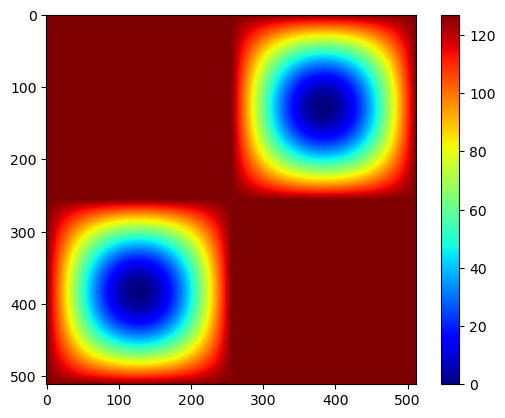

In [33]:
#CORRECTION
img_thres = threshold(img, thres=127)
writeImg(img, 'sinus.pgm')
tup=readImg('sinus.pgm')
plt.imshow(np.reshape(tup[0],tup[1]), cmap=cm.jet) 
plt.colorbar()
plt.show()

# BONUS : stockage des images en format binaire ’P5’

On désire modifier la fonction writeImg(img, filename) pour stocker l’image en niveau
de gris dans un fichier au format binaire ’P5’.

L'ouverture d'un fichier binaire en écriture se fait avec la fonction python open(filename, ’wb’)
et en lecture par open(filename, ’rb’).
Noter que la conversion d'un tableau d'entiers z en octets peut être réalisée avec la fonction membre z.tobytes().

On vous donne les routines d'écriture et de lecture suivantes.

## Exercice :
Vérifier leur bon fonctionnemment.

In [9]:
# Version efficace avec numpy
import numpy as np

def writeImg(img, filename):    
    """
    Ecrit une image contenue dans un tableau numpy dans un fichier PGM format P5 (binaire)
    """
    nrows, ncols = img.shape
    nlevs = img.max()
    assert nlevs < 256, f"Le nombre de niveaux de gris ({nlevs}) dépasse 255"
    
    with open(filename, 'wb') as f:
        # Écriture de l'en-tête en ASCII
        # f.write(...) en mode binaire ('wb') attend des octets (bytes), pas une chaîne
        f.write(b'P5\n')
        f.write(f'{ncols} {nrows}\n'.encode('ascii'))
        f.write(f'{nlevs}\n'.encode('ascii'))
        
        # Conversion en uint8 et écriture directe
        img_bytes = img.astype(np.uint8).tobytes()
        f.write(img_bytes)


## Lecture d'un fichier au format binaire 'P5'

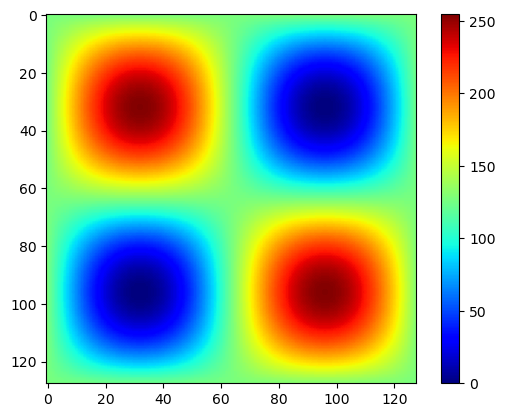

In [12]:
import struct
import numpy as np

import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from PIL import Image
from time import process_time

def readImg(filename):
    """
    Lit un fichier PGM format P5 (binaire)
    Retourne l'image sous forme de tableau numpy
    """
    with open(filename, 'rb') as f:
        # Lecture de l'en-tête
        # La méthode .strip() en Python supprime les espaces et caractères invisibles au début et à la fin d'une chaîne de caractères.
        magic = f.readline().decode('ascii').strip()
        if magic != 'P5':
            raise ValueError(f"Format non supporté: {magic}. Attendu: P5")
        
        # Lecture des dimensions (en gérant les commentaires)
        line = f.readline().decode('ascii').strip()
        while line.startswith('#'):
            line = f.readline().decode('ascii').strip()

        # Ecriture compacte de
        # tokens = line.split(); ncols, nrows = int(tokens[0]), int(tokens[1])
        ncols, nrows = map(int, line.split())
        
        # Lecture de la valeur maximale
        line = f.readline().decode('ascii').strip()
        while line.startswith('#'):
            line = f.readline().decode('ascii').strip()
        
        max_val = int(line)
        
        # Lecture de nrows x ncols octets
        data = f.read(nrows * ncols)

        # np.frombuffer(...) crée un tableau NumPy sans copier les données, directement depuis le buffer mémoire (data)
        img = np.frombuffer(data, dtype=np.uint8)
        # Reshape en matrice 2D
        img = img.reshape(nrows, ncols)
        
    return img
    